## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
import geopandas
from opencage.geocoder import OpenCageGeocode

## Récupération des données dans le csv

In [2]:
csv_file = pd.read_csv("temperatures.csv")

## Températures moyennes françaises de 1995 à 2019

Text(0, 0.5, 'Température (°F) ')

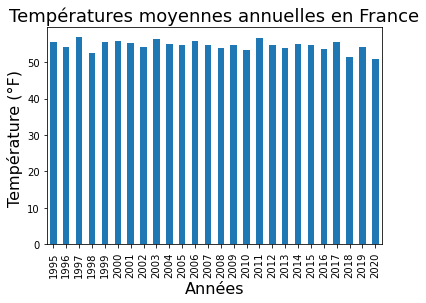

In [3]:
#Filtrage en ne récupérant que les données de la France
df =csv_file[csv_file.Country == 'France']

#Création d'un dataframe contenant les températures et les années
extraction = pd.DataFrame({'temp': df['AvgTemperature'], 'annee': df['Year']})

#Moyenne des températures par année
resultat = extraction.groupby('annee'). mean()

#Affichage du résultat
resultat.plot(kind="bar", legend=False)
plt.title('Températures moyennes annuelles en France', fontsize=18)
plt.xlabel('Années', fontsize=16)
plt.ylabel('Température (°F) ', fontsize=16)


## Evolution moyenne de la température chaque mois de l'année (sur toutes les années donc) de chaque région du globe

Text(130, 10, 'Mois - Années')

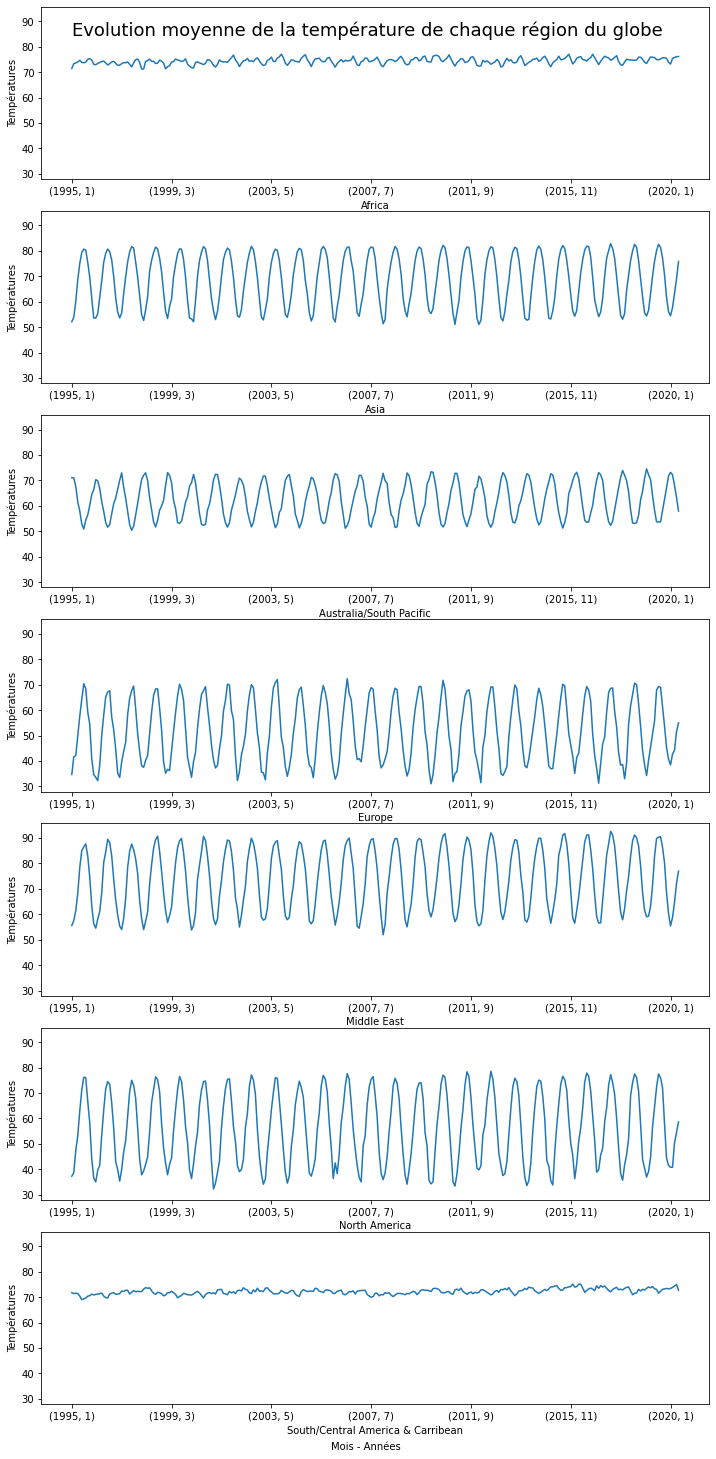

In [4]:
#Initialisation du subplot
fig, axes = plt.subplots(7, figsize=(10, 20),sharey=True)
fig.subplots_adjust(top=0.95)
fig.tight_layout()

#Création d'un dataframe contenant les régions, les températures, le mois, et l'année
extraction = pd.DataFrame({'regions': csv_file['Region'], 'temperatures': csv_file['AvgTemperature'], 'mois': csv_file['Month'], 'annee': csv_file['Year']})

#Filtrage pour récupérer des données depuis une certaine température pour plus de crédibilité
extraction = extraction[extraction['temperatures'] > 0]  

#Récupération des noms de régions dans une liste
nomRegions = extraction.regions.unique()

#Affichage des statistiques
for nombre in range(len(nomRegions)):

    #Récupération et affichage dans le subplot
    recuperation = extraction[extraction['regions'] == nomRegions[nombre]]
    resultat = recuperation.groupby(['annee','mois']).mean()
    resultat.plot(ax = axes[nombre], xlabel = nomRegions[nombre], ylabel = 'Températures', legend=False)

#Affichage du titre et des mois et années
plt.suptitle('Evolution moyenne de la température de chaque région du globe', fontsize=18)
plt.text(130, 10, r'Mois - Années', fontsize=10)

## Classement graphique des pays les plus chauds au monde

Text(0, 0.5, 'Température (°F) ')

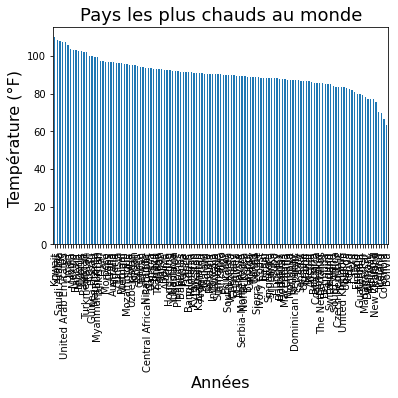

In [5]:
#Création d'un dataframe contenant les pays et les températures
extraction = pd.DataFrame({'pays': csv_file['Country'], 'temperatures': csv_file['AvgTemperature']})

#Filtrage pour récupérer des données depuis une certaine température pour plus de crédibilité
extraction = extraction[extraction['temperatures'] > 0]  

#Regroupement pour créer les moyennes par pays
resultat = extraction.groupby(['pays'])

maximum = resultat.max()
maximum = maximum.sort_values(['temperatures'], ascending=[False])


#Affichage du résultat
maximum.plot(kind="bar", legend=False)
plt.title('Pays les plus chauds au monde', fontsize=18)
plt.xlabel('Années', fontsize=16)
plt.ylabel('Température (°F) ', fontsize=16)


## Classement graphique des pays les plus froids au monde

Text(0, 0.5, 'Température (°F) ')

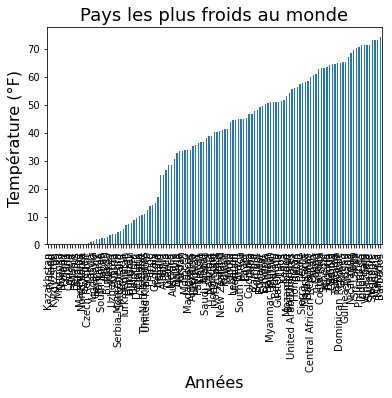

In [6]:
#Création d'un dataframe contenant les pays et les températures
extraction = pd.DataFrame({'pays': csv_file['Country'], 'temperatures': csv_file['AvgTemperature']})

#Filtrage pour récupérer des données depuis une certaine température pour plus de crédibilité
extraction = extraction[extraction['temperatures'] > 0]  

#Regroupement pour créer les moyennes par pays
resultat = extraction.groupby(['pays'])

minimum = resultat.min()
minimum = minimum.sort_values(['temperatures'], ascending=[True])


#Affichage du résultat
minimum.plot(kind="bar", legend=False)
plt.title('Pays les plus froids au monde', fontsize=18)
plt.xlabel('Années', fontsize=16)
plt.ylabel('Température (°F) ', fontsize=16)

## Evolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019

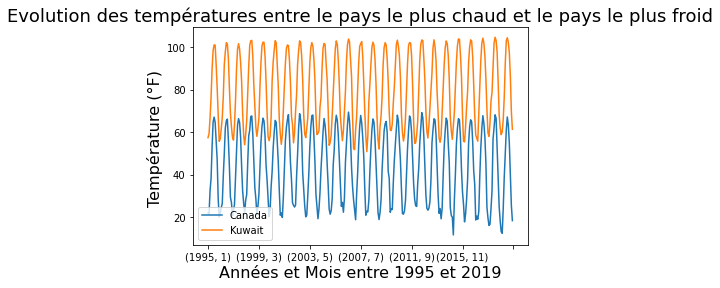

In [7]:
#Création d'un dataframe contenant les pays, les températures et les années
temperaturesMoyennePays = pd.DataFrame({'pays': csv_file['Country'], 'temperatures': csv_file['AvgTemperature'], 'annee': csv_file['Year']})
#Création d'un dataframe contenant les pays, les températures, les mois , et les années
temperaturesDureePays = pd.DataFrame({'pays': csv_file['Country'], 'temperatures': csv_file['AvgTemperature'], 'mois': csv_file['Month'], 'annee': csv_file['Year']})

#Filtrage pour récupérer des données depuis une certaine température pour plus de crédibilité
temperaturesMoyennePays = temperaturesMoyennePays[temperaturesMoyennePays['temperatures'] > 0] 
temperaturesDureePays = temperaturesDureePays[temperaturesDureePays['temperatures'] > 0]   

#Filtrages pour récupérer des données entre l'an 1995 et 2019
temperaturesMoyennePays = temperaturesMoyennePays[temperaturesMoyennePays['annee'] >= 1995] 
temperaturesMoyennePays = temperaturesMoyennePays[temperaturesMoyennePays['annee'] <= 2019] 

temperaturesDureePays = temperaturesDureePays[temperaturesDureePays['annee'] >= 1995] 
temperaturesDureePays = temperaturesDureePays[temperaturesDureePays['annee'] <= 2019] 

#Mise en moyenne pour mieux détecter les pays concernés
regroupementMoyenne = temperaturesMoyennePays.groupby(['temperatures'])

#Récupération des pays concernés
minimum = regroupementMoyenne.min()
minimum = minimum.sort_values(['temperatures'], ascending=[True])

maximum = regroupementMoyenne.max()
maximum = maximum.sort_values(['temperatures'], ascending=[False])

paysMinimales = minimum['pays'].iloc[0]
paysMaximales = maximum['pays'].iloc[0]

#Récupération des valeurs des pays concenés
for nombre in range(2):
    if (nombre == 0):
        nomPaysMinimales = temperaturesDureePays[temperaturesDureePays['pays'] == paysMinimales]
    if (nombre == 1):
        nomPaysMaximales = temperaturesDureePays[temperaturesDureePays['pays'] == paysMaximales]

#Regroupement de ces valeurs
resultatMinimales = nomPaysMinimales.groupby(['annee','mois']).mean()
resultatMaximales = nomPaysMaximales.groupby(['annee','mois']).mean()

#Affichage des résultats dans un graphique
ax = resultatMinimales.plot()
resultatMaximales.plot(ax=ax)

plt.title('Evolution des températures entre le pays le plus chaud et le pays le plus froid', fontsize=18)
plt.xlabel('Années et Mois entre 1995 et 2019', fontsize=16)
plt.ylabel('Température (°F) ', fontsize=16)
legendes = plt.legend()
legendes.get_texts()[0].set_text(paysMinimales)
legendes.get_texts()[1].set_text(paysMaximales)


## Evolution de la température moyenne de la ville de Paris

Text(0, 0.5, 'Température (°F) ')

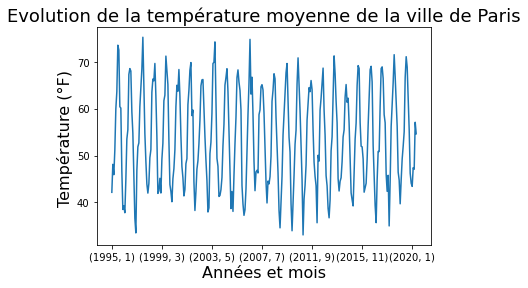

In [8]:
#Création d'un dataframe contenant les pays, les températures, les mois , et les années
temperaturesVilles = pd.DataFrame({'ville': csv_file['City'], 'temperatures': csv_file['AvgTemperature'], 'mois': csv_file['Month'], 'annee': csv_file['Year']})

#Filtrage pour récupérer des données depuis une certaine température pour plus de crédibilité
temperaturesVilles = temperaturesVilles[temperaturesVilles['temperatures'] > 0] 

#Récupération des valeurs de la ville de Paris
donneesParis = temperaturesVilles[temperaturesVilles['ville'] == 'Paris']

#Regroupement des données de Paris en fonction du mois
resultatParis = donneesParis.groupby(['annee','mois']).mean()

#Affichage du résultat
resultatParis.plot(kind='line',y='temperatures', legend=False)
plt.title('Evolution de la température moyenne de la ville de Paris', fontsize=18)
plt.xlabel('Années et mois', fontsize=16)
plt.ylabel('Température (°F) ', fontsize=16)

## Température moyenne de chaque pays sur une carte sur la période 2010-2019

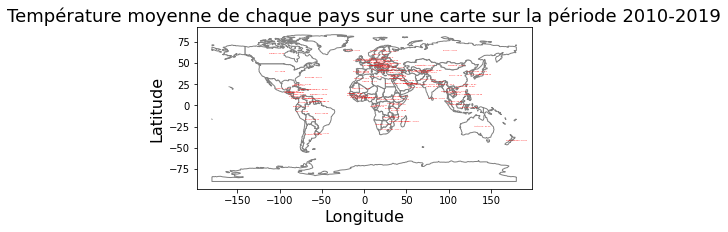

In [9]:
key = '61edf29d15db48e8afaa63d1bcabb88a'    #Déclaration de la clé API
geocoder = OpenCageGeocode(key)             #Activation de geocoder

#Création d'un dataframe contenant les pays et les températures
extraction = pd.DataFrame({'pays': csv_file['Country'], 'temperatures': csv_file['AvgTemperature']})

#Filtrage pour récupérer des données depuis une certaine température pour plus de crédibilité
extraction = extraction[extraction['temperatures'] > 0]  

#Moyenne des températures par pays
moyennepays = extraction.groupby('pays'). mean()

#Récupération des noms de régions dans une liste
nomPays = extraction.pays.unique()

#Moyenne des températures par pays
moyennepays = extraction.groupby('pays'). mean()

#Préparation de la couleur pour la carte mondiale.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='grey')

#Chaque pays va être ajouté à ce dataframe avec ses données
for repere in range(len(nomPays)):
    nom = nomPays[repere]

    #Récupération des coordonnées
    resulatCoordonnees = geocoder.geocode(nom, no_annotations='1')
    lon = resulatCoordonnees[0]['geometry']['lng']
    lat = resulatCoordonnees[0]['geometry']['lat']

    #Affichage du pays et de sa température moyenne sur la carte
    plt.text(lon - 5, lat, str(nom) + " : " + str(round(moyennepays['temperatures'].iloc[repere], 2)), fontsize = 2, color='red')

#Afichage de la carte
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#Affichage du résultat
plt.title('Température moyenne de chaque pays sur une carte sur la période 2010-2019', fontsize=18)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.show()